In [9]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import f1_score
import time
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv("/Users/daniiltekunov/Desktop/train.csv")

print(data[0:5])

y = data.medv

X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
print("__________")
print(y[0:5])
print("__________")
print(X[0:5])

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  
__________
0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64
__________
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.0

Now, let's split the sample via 7:3:

In [6]:
# Saving seed 
divide_seed = np.random.randint(1, 100)

# And then split the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

# And check if they splitted correctly
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

266
67
266
67


Also, we need to normallize and scale the data, so we'll use Scaler:

In [7]:
scaler = StandardScaler()

# We normalize train sample
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# And test sample
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Let's start with a linear regression all over the model:


In [39]:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.73337876115717
Train result: 0.6931083579594669


Now, let's try to improve the quality by using ID feature too:

In [51]:
y = data.medv

X = data.drop('medv', axis=1)
#X = X.drop('ID', axis=1)

divide_seed = np.random.randint(1, 100)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

#####
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)

#####
prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.6987528261011171
Train result: 0.730170455932659


Didn't work, so let's try again and remove the unnecessary features:

In [53]:
y = data.medv

X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
X = X.drop('zn', axis=1)


divide_seed = np.random.randint(1, 100)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

#####
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)

#####
prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.7555769924688236
Train result: 0.7097278698368696


This worked, as we can see, the accuracy of the model improved.

Let's try to remove some more features:

In [70]:
y = data.medv

X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
X = X.drop('zn', axis=1)
X = X.drop('nox', axis=1)


divide_seed = np.random.randint(1, 100)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

#####
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train, y_train)

#####
prediction_lr = lr.predict(X_test)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.7917479370569762
Train result: 0.6999386348363776


Final result is quite well. Let's take a look at coefs in addition:

[-0.25636249  0.67220722 -0.01743912 -1.88414637  3.66640338 -0.42309502
 -3.23880119 -1.54193348 -3.73113393]


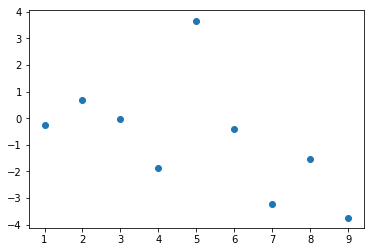

In [91]:
importances = list(lr.coef_)

number = list(range(1, 10, 1))

print(lr.coef_)

plt.scatter(x=number, y=importances)

But what if our case is rare and the best accuracy of a basic model can be better? Let's take a look at both models in perspective:

In [98]:
list_of_acc = list()
y = data.medv

X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)
X = X.drop('zn', axis=1)
X = X.drop('nox', axis=1)

for i in range(1, 1000):
    divide_seed = np.random.randint(1, 100)

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

#####
    scaler = StandardScaler()

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    scaler.fit(X_test)
    X_test = scaler.transform(X_test)

    lr = LinearRegression()

    lr.fit(X_train, y_train)

#####
    prediction_lr = lr.predict(X_test)

    list_of_acc.append(lr.score(X_test, y_test))
    
print("Max accuracy: ", max(list_of_acc))

Max accuracy:  0.8209416388859451


In [99]:
list_of_acc = list()
y = data.medv

X = data.drop('medv', axis=1)
X = X.drop('ID', axis=1)

for i in range(1, 1000):
    divide_seed = np.random.randint(1, 100)

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=divide_seed)

#####
    scaler = StandardScaler()

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    scaler.fit(X_test)
    X_test = scaler.transform(X_test)

    lr = LinearRegression()

    lr.fit(X_train, y_train)

#####
    prediction_lr = lr.predict(X_test)

    list_of_acc.append(lr.score(X_test, y_test))
    
print("Max accuracy: ", max(list_of_acc))

Max accuracy:  0.8370074316577969


The hypothesis confirmed. Basic model has better accuracy.

[-0.68366883  0.99670717  0.42212487  0.72355171 -1.68213648  3.10149278
 -0.37435981 -3.13540497  2.70496033 -1.7157683  -1.97716318  0.98716755
 -4.0320161 ]


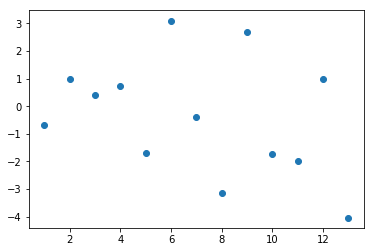

In [102]:
importances = list(lr.coef_)

number = list(range(1, 14, 1))

print(lr.coef_)

plt.scatter(x=number, y=importances)